In [25]:
import numpy as np
import scipy.constants as phy_const
import matplotlib.pyplot as plt
import pickle
import math
import os

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import os
import pandas as pd
import pickle
import glob
import sys
import configparser


In [26]:
dirname = os.getcwd()
datapath1 = dirname+"/Results/alphaB_param_study"

## Parametric research of the best $\alpha_B$,with imposed $S_{iz}$, $K_el = 2.5\times 10^{-13}$ and $\nu_{iw} = 0$

The aim of the script FLHET_AlphaB_param_prm_study.py is to launch several simulations with different couples of $(\alpha_{B1}, \alpha_{B2})$. From these simulations, we extract the current density at stationary regime, i.e. virtual time being $t = 20~\mu s$. $\alpha_{B1}$ is the anomalous transport coefficient in the channel  whereas $\alpha_{B2}$ is the one ine the plume.

In [27]:
alpha_B1_mesh   = np.loadtxt(datapath1+"/alphaB1_mesh.csv", delimiter='\t')
alpha_B2_mesh   = np.loadtxt(datapath1+"/alphaB2_mesh.csv", delimiter='\t')
means_j         = np.loadtxt(datapath1+"/mean_j_array.csv", delimiter='\t')

Since we assume that anomalous transport is greater in the plume than in the channel, the $\alpha_{B1} > \alpha_{B2}$ cases were not treated in the treatment script. That corresponds to exactly 0. values for $i > j$ indexes in the means_j array. 

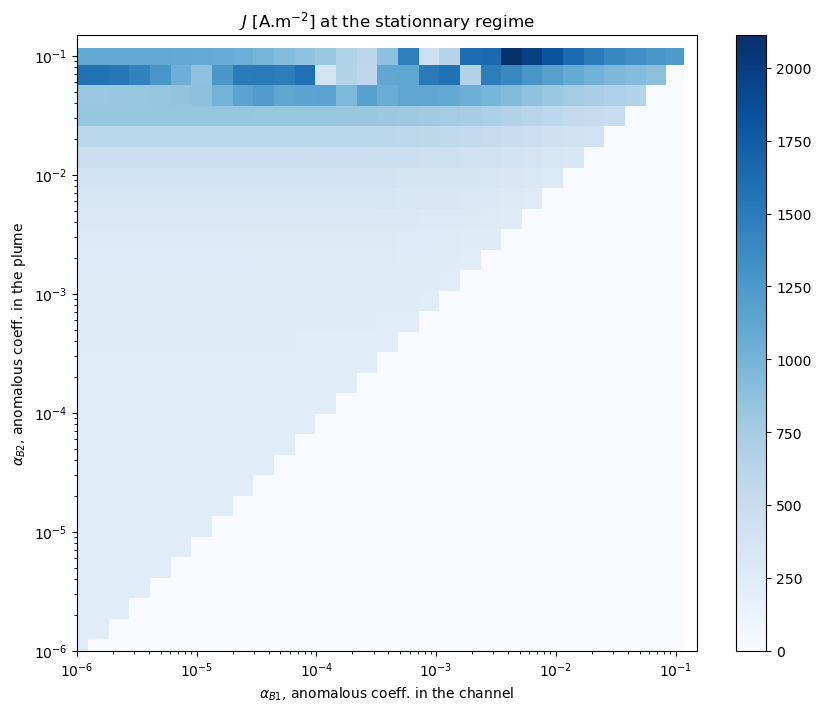

In [28]:
fig = plt.figure(figsize=(10, 8),  dpi = 100)

# vmaxcolormap0 = max(abs(means_j.min()), abs(means_j.max()))
# colornorm0 = mcolors.TwoSlopeNorm(vmin=min(-0.1,-vmaxcolormap0), vcenter=0., vmax=max(0.1,vmaxcolormap0))
# pcm0 = plt.pcolormesh(alpha_B1_mesh, alpha_B2_mesh, means_j, shading='nearest', norm=colornorm0, cmap='Blues')
pcm0 = plt.pcolormesh(alpha_B1_mesh, alpha_B2_mesh, means_j, shading='nearest', cmap='Blues')
fig.colorbar(pcm0)
plt.xscale('log')
plt.xlim([1e-6,0.15])
plt.yscale('log')
plt.ylim([1e-6,0.15])
plt.xlabel("$\\alpha_{B1}$, anomalous coeff. in the channel")
plt.ylabel("$\\alpha_{B2}$, anomalous coeff. in the plume")
plt.title("$J$ [A.m$^{-2}$] at the stationnary regime")
plt.show()

### 1D plot

In [29]:
ias = [0,
       9,
       18,
       27
]
alpha_B1_sca  = alpha_B1_mesh[0,ias]
print(alpha_B1_sca)

[1.00000000e-06 3.56224789e-05 1.26896100e-03 4.52035366e-02]


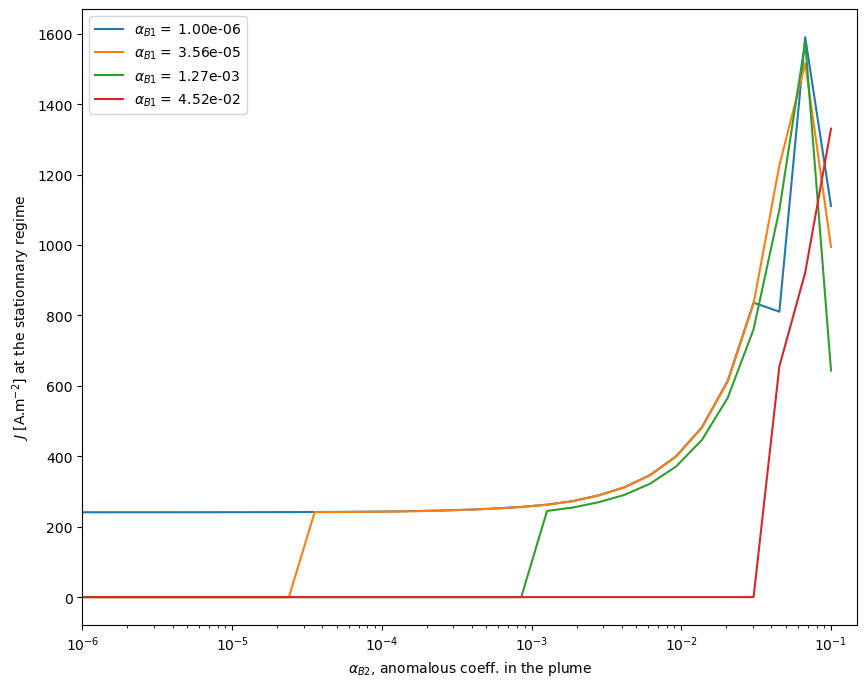

In [30]:
ncurves = len(ias)
fig = plt.figure(figsize=(10, 8),  dpi = 100)

for i in range(ncurves):
    alpha_B2_1D = alpha_B2_mesh[:,ias[i]]
    means_j_1D = means_j[:,ias[i]]
    templabel = "$\\alpha_{B1} =~$" + f"{alpha_B1_mesh[0,ias[i]]:.2e}"
    plt.plot(alpha_B2_1D, means_j_1D, label=templabel)
    
plt.xscale('log')
plt.xlim([1e-6,0.15])
plt.ylabel("$J$ [A.m$^{-2}$] at the stationnary regime")
plt.xlabel("$\\alpha_{B2}$, anomalous coeff. in the plume")
plt.legend()
plt.show()

## Looking at the value from Thomas Charoy PIC simulation

For $B = 100$ G, the study in 4th chapter of Thomas has found that the final current density would be $J_{tot} = 690$ A.m $^{-2}$. That's why from the results of the previous parametric study I look for $(\alpha_{B1}, \alpha_{B2})$ couples that achieve this current density.

In [31]:
j_diff_arr = np.absolute(means_j - 690)

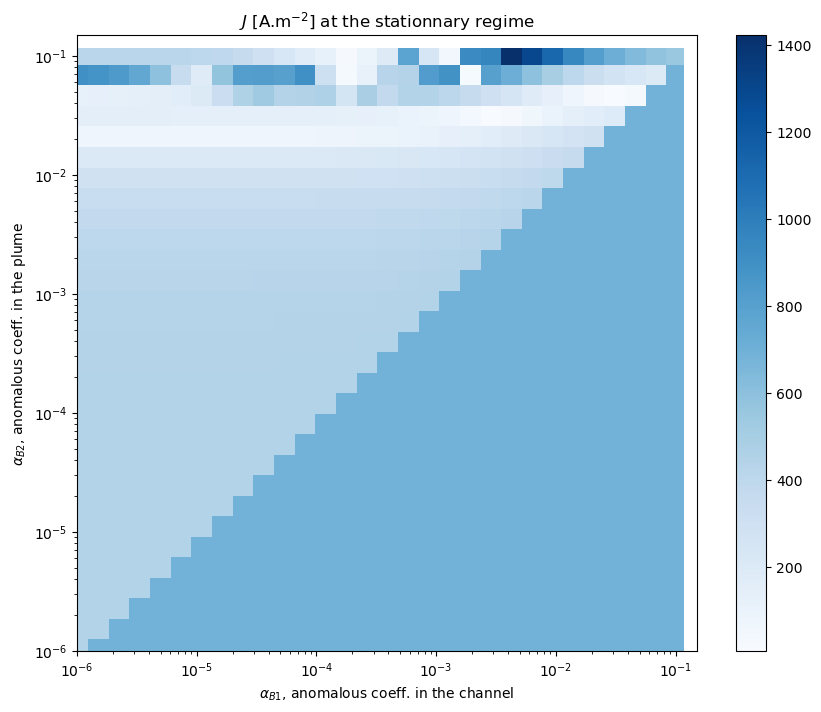

In [32]:
fig = plt.figure(figsize=(10, 8),  dpi = 100)

# vmaxcolormap0 = max(abs(means_j.min()), abs(means_j.max()))
# colornorm0 = mcolors.TwoSlopeNorm(vmin=min(-0.1,-vmaxcolormap0), vcenter=0., vmax=max(0.1,vmaxcolormap0))
# pcm0 = plt.pcolormesh(alpha_B1_mesh, alpha_B2_mesh, means_j, shading='nearest', norm=colornorm0, cmap='Blues')
pcm0 = plt.pcolormesh(alpha_B1_mesh, alpha_B2_mesh, j_diff_arr, shading='nearest', cmap='Blues')
fig.colorbar(pcm0)
plt.xscale('log')
plt.xlim([1e-6,0.15])
plt.yscale('log')
plt.ylim([1e-6,0.15])
plt.xlabel("$\\alpha_{B1}$, anomalous coeff. in the channel")
plt.ylabel("$\\alpha_{B2}$, anomalous coeff. in the plume")
plt.title("$J$ [A.m$^{-2}$] at the stationnary regime")
plt.show()

### 1D Plot

In [33]:
ias = [0,
       9,
       17,
       27
]
alpha_B1_sca  = alpha_B1_mesh[0,ias]
print(alpha_B1_sca)

[1.00000000e-06 3.56224789e-05 8.53167852e-04 4.52035366e-02]


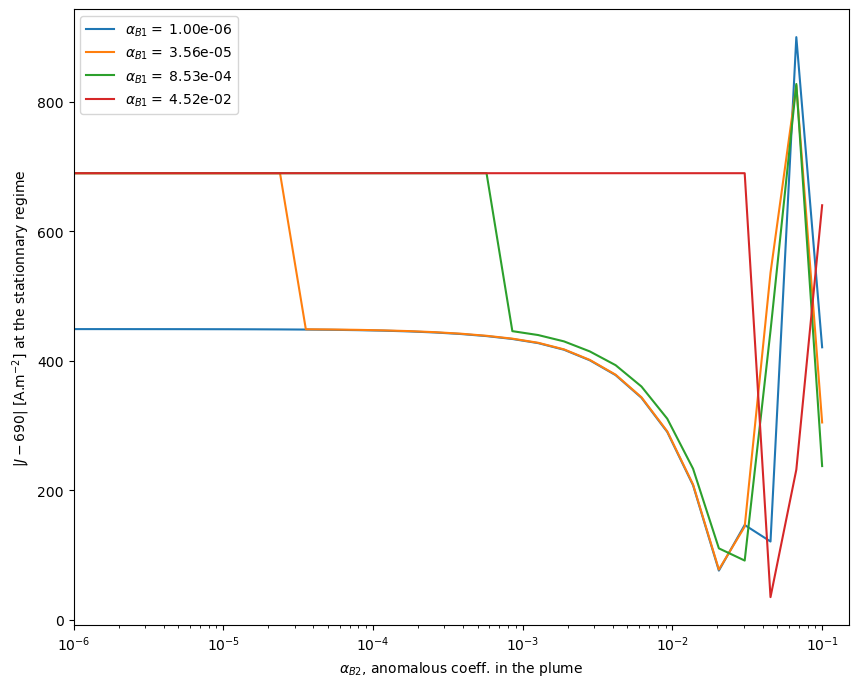

In [34]:
ncurves = len(ias)
fig = plt.figure(figsize=(10, 8),  dpi = 100)

for i in range(ncurves):
    alpha_B2_1D = alpha_B2_mesh[:,ias[i]]
    j_diff_1D = j_diff_arr[:,ias[i]]
    templabel = "$\\alpha_{B1} =~$" + f"{alpha_B1_mesh[0,ias[i]]:.2e}"
    plt.plot(alpha_B2_1D, j_diff_1D, label=templabel)
    
plt.xscale('log')
plt.xlim([1e-6,0.15])
plt.ylabel("$|J - 690|$ [A.m$^{-2}$] at the stationnary regime")
plt.xlabel("$\\alpha_{B2}$, anomalous coeff. in the plume")
plt.legend()
plt.show()

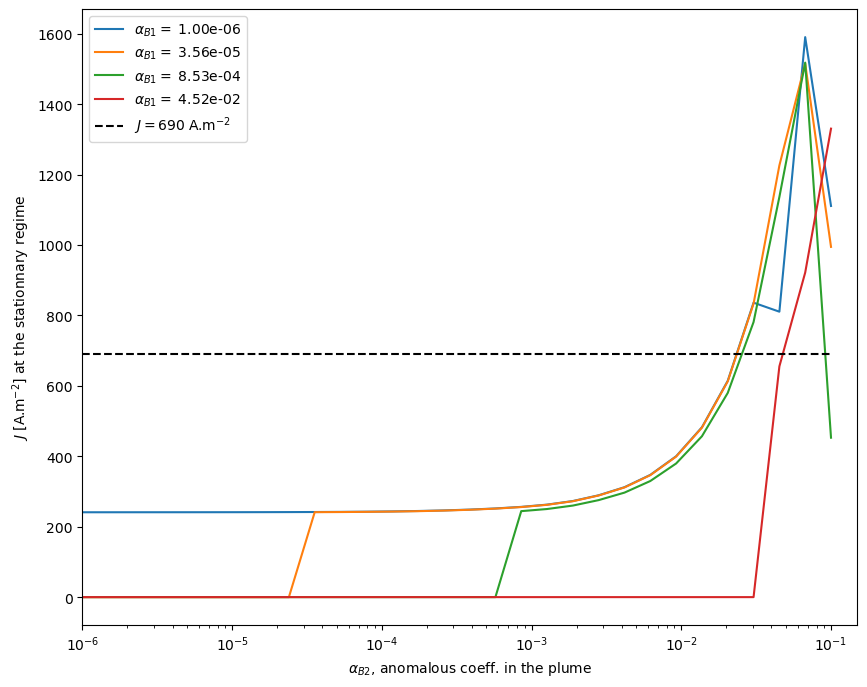

In [35]:
ncurves = len(ias)
fig = plt.figure(figsize=(10, 8),  dpi = 100)

for i in range(ncurves):
    alpha_B2_1D = alpha_B2_mesh[:,ias[i]]
    means_j_1D = means_j[:,ias[i]]
    templabel = "$\\alpha_{B1} =~$" + f"{alpha_B1_mesh[0,ias[i]]:.2e}"
    plt.plot(alpha_B2_1D, means_j_1D, label=templabel)

plt.plot([alpha_B2_1D[0],alpha_B2_1D[-1]], [690,690], 'k--', label='$J = 690$ A.m$^{-2}$')
plt.xscale('log')
plt.xlim([1e-6,0.15])
plt.ylabel("$J$ [A.m$^{-2}$] at the stationnary regime")
plt.xlabel("$\\alpha_{B2}$, anomalous coeff. in the plume")
plt.legend()
plt.show()

If we fix the $\alpha_{B1} = 8.53 \times 10^{-4}$, the $\alpha_{B2}$ that achieves best the desired current density is 

In [36]:
iaB1 = 17
print("alpha_{B1} =", f"{alpha_B1_mesh[0,iaB1]:.2e}")
means_j_1D = means_j[:,iaB1]
alpha_B2_1D = alpha_B2_mesh[:, iaB1]

n = means_j_1D.shape[0]
list_x_zeros = []
list_y_zeros = []
previous_bool = (means_j_1D[0] >= 690.)
for i in range(1, n):
    current_bool = (means_j_1D[i] >= 690.)
    xor = (current_bool & (not previous_bool))|((not current_bool) & previous_bool)
    if xor:
        x0 = alpha_B2_1D[i-1]
        x1 = alpha_B2_1D[i]
        y0 = means_j_1D[i-1]
        y1 = means_j_1D[i]
        x = x0 + (x1 - x0)*(690 - y0)/(y1 - y0) # linear interpolation achieving J = 690 A.m^{-2}

        list_x_zeros.append( x )

    previous_bool = current_bool

print("list of alpha_{B2}", list_x_zeros)
print("list of J_{tot}", list_y_zeros)

    

alpha_{B1} = 8.53e-04
list of alpha_{B2} [0.025878912863667274, 0.09270201509077511]
list of J_{tot} []


It seems that the $\alpha_{B2}$ achieving the best value of current density is $\alpha_{B2} = 2.59 \times 10^{-2}$

In conclusion, the took on couple of anomalous coefficients is $(\alpha_{B1}, \alpha_{B2}) = (8.53 \times 10^{-4}, 2.59 \times 10^{-2})$.

## Parametric research of the best $\alpha_B$,with imposed $S_{iz}$, $K_{el} = 0$ and $\nu_{iw} = 0$

The aim of the script FLHET_AlphaB_param_prm_study.py is to launch several simulations with different couples of $(\alpha_{B1}, \alpha_{B2})$. From these simulations, we extract the current density at stationary regime, i.e. virtual time being $t = 30~\mu s$. $\alpha_{B1}$ is the anomalous transport coefficient in the channel  whereas $\alpha_{B2}$ is the one ine the plume.

In [37]:
dirname = os.getcwd()
datapath2 = dirname + "/Results/2nd_alphaB_param_study"

In [38]:
alpha_B1_mesh   = np.loadtxt(datapath2+"/alphaB1_mesh.csv", delimiter='\t')
alpha_B2_mesh   = np.loadtxt(datapath2+"/alphaB2_mesh.csv", delimiter='\t')
means_j         = np.loadtxt(datapath2+"/mean_j_array.csv", delimiter='\t')

Since we assume that anomalous transport is greater in the plume than in the channel, the $\alpha_{B1} > \alpha_{B2}$ cases were not treated in the treatment script. That corresponds to exactly 0. values for $i > j$ indexes in the means_j array. 

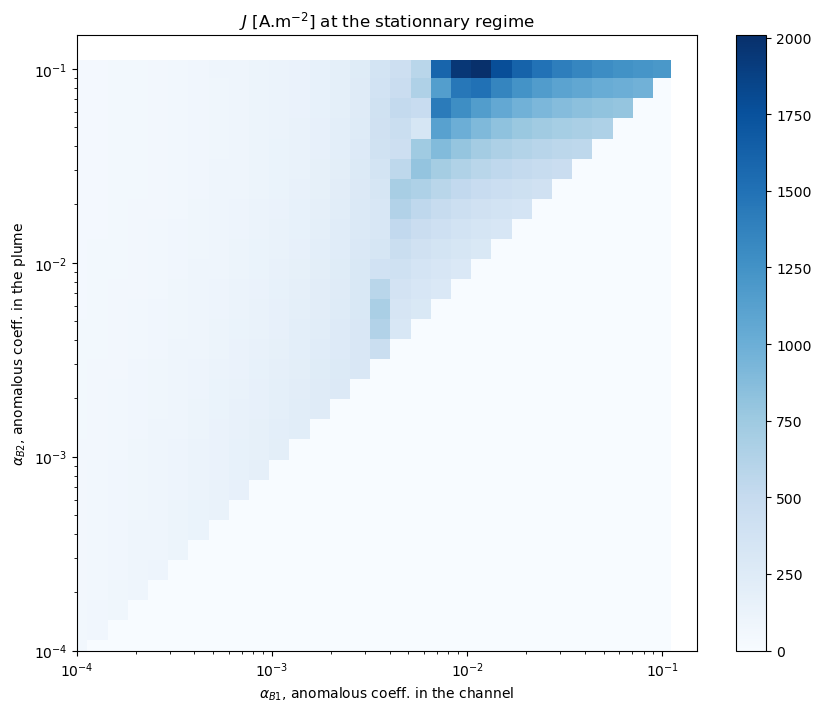

In [39]:
fig = plt.figure(figsize=(10, 8),  dpi = 100)

pcm0 = plt.pcolormesh(alpha_B1_mesh, alpha_B2_mesh, means_j, shading='nearest', cmap='Blues')
fig.colorbar(pcm0)
plt.xscale('log')
plt.xlim([1e-4,0.15])
plt.yscale('log')
plt.ylim([1e-4,0.15])
plt.xlabel("$\\alpha_{B1}$, anomalous coeff. in the channel")
plt.ylabel("$\\alpha_{B2}$, anomalous coeff. in the plume")
plt.title("$J$ [A.m$^{-2}$] at the stationnary regime")
plt.show()

### 1D plot

In [40]:
ias = [18,
       19,
       20,
       21
]
alpha_B1_sca  = alpha_B1_mesh[0,ias]
print(alpha_B1_sca)

[0.00727895 0.00923671 0.01172102 0.01487352]


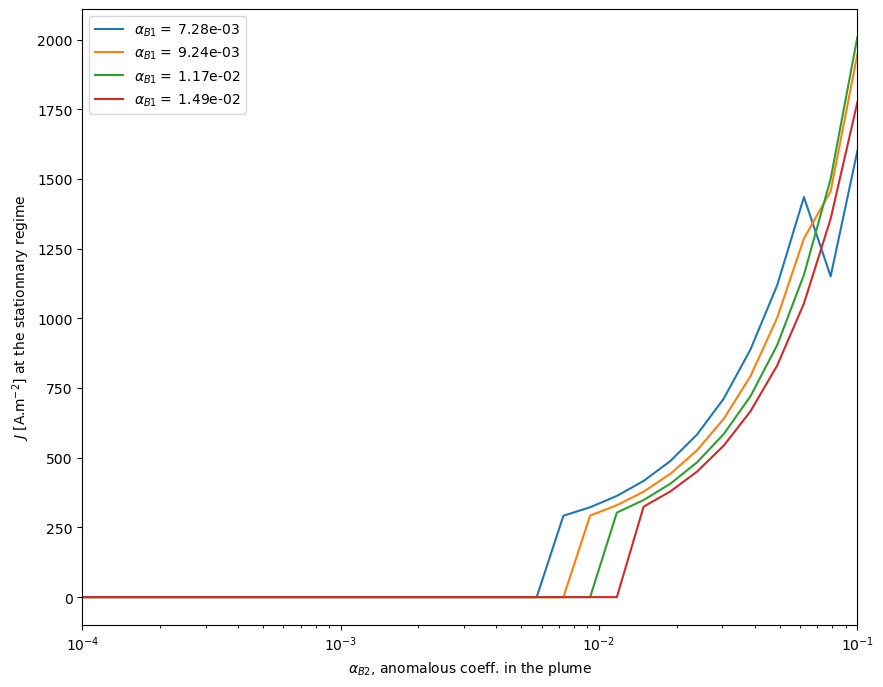

In [41]:
ncurves = len(ias)
fig = plt.figure(figsize=(10, 8),  dpi = 100)

for i in range(ncurves):
    alpha_B2_1D = alpha_B2_mesh[:,ias[i]]
    means_j_1D = means_j[:,ias[i]]
    templabel = "$\\alpha_{B1} =~$" + f"{alpha_B1_mesh[0,ias[i]]:.2e}"
    plt.plot(alpha_B2_1D, means_j_1D, label=templabel)
    
plt.xscale('log')
plt.xlim([1e-4,0.1])
plt.ylabel("$J$ [A.m$^{-2}$] at the stationnary regime")
plt.xlabel("$\\alpha_{B2}$, anomalous coeff. in the plume")
plt.legend()
plt.show()

## Looking at the value from Thomas Charoy PIC simulation

For $B = 100$ G, the study in 4th chapter of Thomas has found that the final current density would be $J_{tot} = 690$ A.m $^{-2}$. That's why from the results of the previous parametric study I look for $(\alpha_{B1}, \alpha_{B2})$ couples that achieve this current density.

In [42]:
j_diff_arr = np.absolute(means_j - 690)

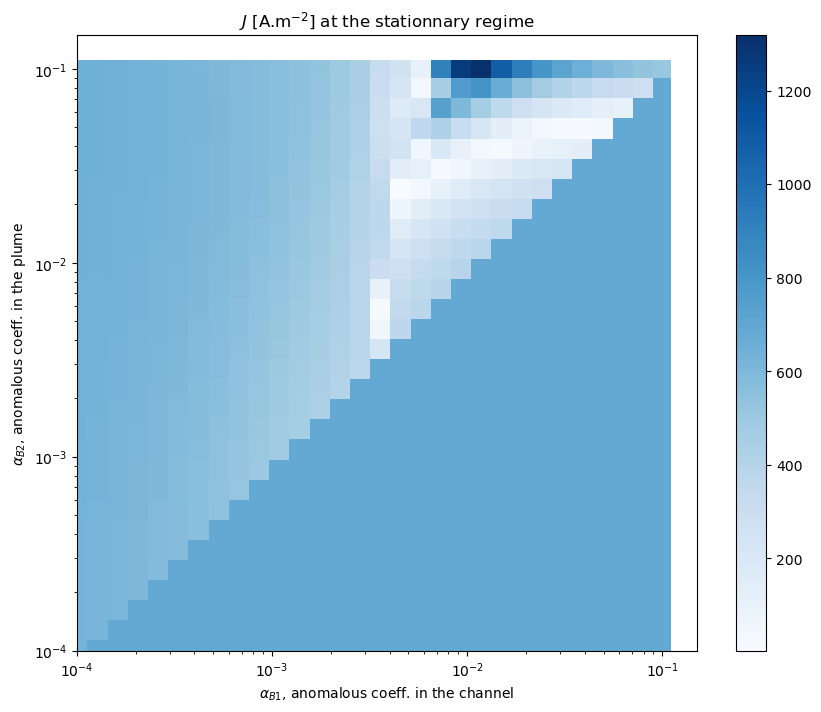

In [43]:
fig = plt.figure(figsize=(10, 8),  dpi = 100)

# vmaxcolormap0 = max(abs(means_j.min()), abs(means_j.max()))
# colornorm0 = mcolors.TwoSlopeNorm(vmin=min(-0.1,-vmaxcolormap0), vcenter=0., vmax=max(0.1,vmaxcolormap0))
# pcm0 = plt.pcolormesh(alpha_B1_mesh, alpha_B2_mesh, means_j, shading='nearest', norm=colornorm0, cmap='Blues')
pcm0 = plt.pcolormesh(alpha_B1_mesh, alpha_B2_mesh, j_diff_arr, shading='nearest', cmap='Blues')
fig.colorbar(pcm0)
plt.xscale('log')
plt.xlim([1e-4,0.15])
plt.yscale('log')
plt.ylim([1e-4,0.15])
plt.xlabel("$\\alpha_{B1}$, anomalous coeff. in the channel")
plt.ylabel("$\\alpha_{B2}$, anomalous coeff. in the plume")
plt.title("$J$ [A.m$^{-2}$] at the stationnary regime")
plt.show()

### 1D Plot

In [44]:
ias = [14,
       15,
       16,
       17,
       18,
       19,
       20,
       21
]
alpha_B1_sca  = alpha_B1_mesh[0,ias]
print(alpha_B1_sca)

[0.00280722 0.00356225 0.00452035 0.00573615 0.00727895 0.00923671
 0.01172102 0.01487352]


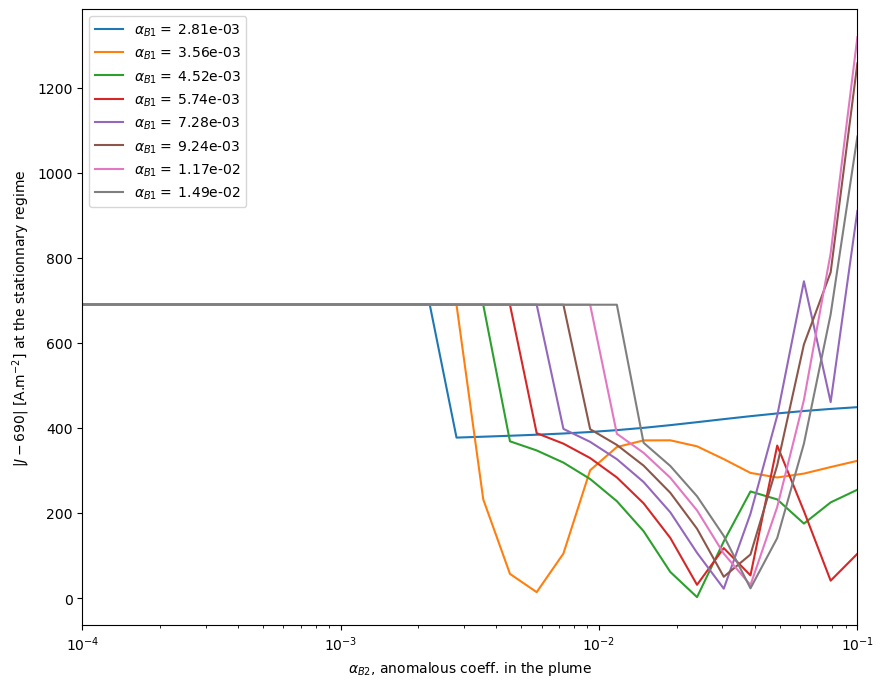

In [45]:
ncurves = len(ias)
fig = plt.figure(figsize=(10, 8),  dpi = 100)

for i in range(ncurves):
    alpha_B2_1D = alpha_B2_mesh[:,ias[i]]
    j_diff_1D = j_diff_arr[:,ias[i]]
    templabel = "$\\alpha_{B1} =~$" + f"{alpha_B1_mesh[0,ias[i]]:.2e}"
    plt.plot(alpha_B2_1D, j_diff_1D, label=templabel)
    
plt.xscale('log')
plt.xlim([1e-4,0.1])
plt.ylabel("$|J - 690|$ [A.m$^{-2}$] at the stationnary regime")
plt.xlabel("$\\alpha_{B2}$, anomalous coeff. in the plume")
plt.legend()
plt.show()

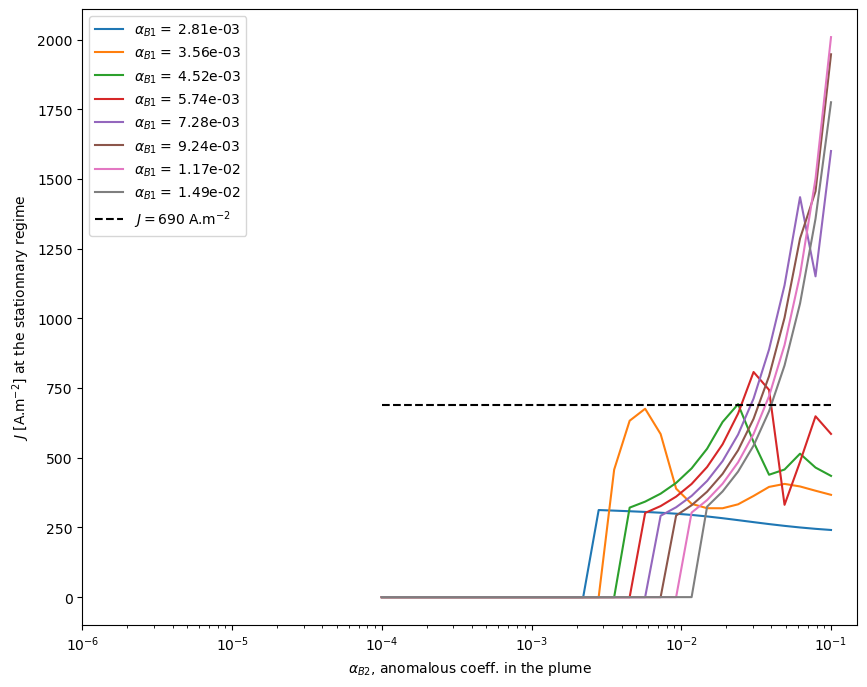

In [46]:
ncurves = len(ias)
fig = plt.figure(figsize=(10, 8),  dpi = 100)

for i in range(ncurves):
    alpha_B2_1D = alpha_B2_mesh[:,ias[i]]
    means_j_1D = means_j[:,ias[i]]
    templabel = "$\\alpha_{B1} =~$" + f"{alpha_B1_mesh[0,ias[i]]:.2e}"
    plt.plot(alpha_B2_1D, means_j_1D, label=templabel)

plt.plot([alpha_B2_1D[0],alpha_B2_1D[-1]], [690,690], 'k--', label='$J = 690$ A.m$^{-2}$')
plt.xscale('log')
plt.xlim([1e-6,0.15])
plt.ylabel("$J$ [A.m$^{-2}$] at the stationnary regime")
plt.xlabel("$\\alpha_{B2}$, anomalous coeff. in the plume")
plt.legend()
plt.show()

If we fix the $\alpha_{B1} = 7.28 \times 10^{-3}$, the $\alpha_{B2}$ that achieves best the desired current density is 

In [47]:
iaB1 = 18
print("alpha_{B1} =", f"{alpha_B1_mesh[0,iaB1]:.2e}")
means_j_1D = means_j[:,iaB1]
alpha_B2_1D = alpha_B2_mesh[:, iaB1]

n = means_j_1D.shape[0]
list_x_zeros = []
list_y_zeros = []
previous_bool = (means_j_1D[0] >= 690.)
for i in range(1, n):
    current_bool = (means_j_1D[i] >= 690.)
    xor = (current_bool & (not previous_bool))|((not current_bool) & previous_bool)
    if xor:
        x0 = alpha_B2_1D[i-1]
        x1 = alpha_B2_1D[i]
        y0 = means_j_1D[i-1]
        y1 = means_j_1D[i]
        x = x0 + (x1 - x0)*(690 - y0)/(y1 - y0) # linear interpolation achieving J = 690 A.m^{-2}

        list_x_zeros.append( x )

    previous_bool = current_bool

print("list of alpha_{B2}", list_x_zeros)
print("list of J_{tot}", list_y_zeros)

    

alpha_{B1} = 7.28e-03
list of alpha_{B2} [0.02927576398165503]
list of J_{tot} []


It seems that the $\alpha_{B2}$ achieving the best value of current density is $\alpha_{B2} = 2.93 \times 10^{-2}$

In conclusion, the took on couple of anomalous coefficients is $(\alpha_{B1}, \alpha_{B2}) = (7.28 \times 10^{-3}, 2.93 \times 10^{-2})$.

# Summary

| Ionization        | Elastic collisions            | Wall recombination    | (One of the) Best $(\alpha_{B1}, \alpha_{B2})$    |
| ----------        | ------------------            | ------------------    | ---------------------------------                 |
| Imposed $S_{iz}$  | $K_{el} = 0$                  | None                  |      $(7.28 \times 10^{-3}, 2.93 \times 10^{-2})$ |
| Imposed $S_{iz}$  | $K_{el} = 2.5\times 10^{-13}$ | None                  |      $(8.53 \times 10^{-4}, 2.59 \times 10^{-2})$ |      